In [ ]:
!pip install tensorflow==2.12.0
!pip install gradio

In [ ]:
# Import libraries
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


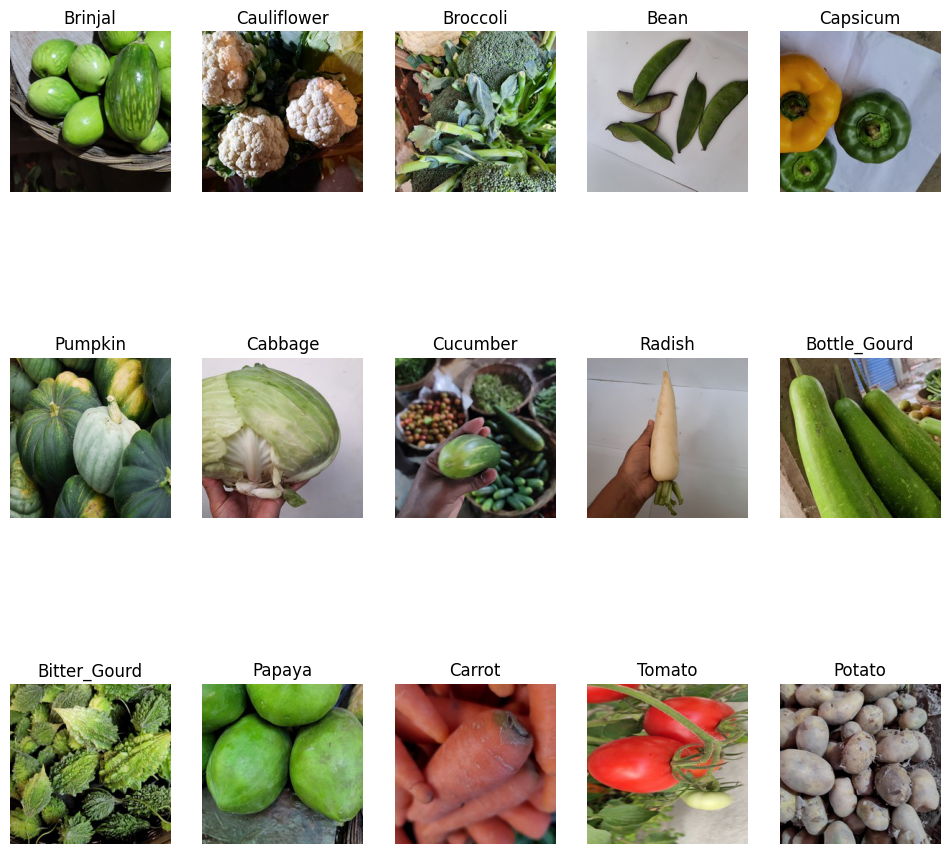

In [ ]:
train_path = "/content/drive/MyDrive/Big/Kaggle/train"
validation_path = "/content/drive/MyDrive/Big/Kaggle/validation"
test_path = "/content/drive/MyDrive/Big/Kaggle/test"

image_categories = os.listdir('/content/drive/MyDrive/Big/Kaggle/train')

def plot_images(image_categories):

    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):

        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0


        # Create Subplot and plot the images
        plt.subplot(3, 5, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.show()

# Call the function
plot_images(image_categories)

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [ ]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator,
                 epochs=100,
                 verbose=1,
                 validation_data=val_image_generator,
                 steps_per_epoch = 15000//32,
                 validation_steps = 3000//32,
                 callbacks=early_stopping)

Epoch 1/100
468/468 [==============================] - 4029s 9s/step - loss: 1.2686 - accuracy: 0.5826 - val_loss: 0.5811 - val_accuracy: 0.8155
Epoch 2/100
468/468 [==============================] - 704s 2s/step - loss: 0.5647 - accuracy: 0.8183 - val_loss: 0.4077 - val_accuracy: 0.8851
Epoch 3/100
468/468 [==============================] - 704s 2s/step - loss: 0.3460 - accuracy: 0.8899 - val_loss: 0.2903 - val_accuracy: 0.9157
Epoch 4/100
468/468 [==============================] - 701s 1s/step - loss: 0.2242 - accuracy: 0.9272 - val_loss: 0.2198 - val_accuracy: 0.9432
Epoch 5/100
468/468 [==============================] - 707s 2s/step - loss: 0.1813 - accuracy: 0.9425 - val_loss: 0.2439 - val_accuracy: 0.9328
Epoch 6/100
468/468 [==============================] - 710s 2s/step - loss: 0.1531 - accuracy: 0.9497 - val_loss: 0.2888 - val_accuracy: 0.9251
Epoch 7/100
468/468 [==============================] - 711s 2s/step - loss: 0.1383 - accuracy: 0.9556 - val_loss: 0.2461 - val_accuracy

In [ ]:
model.evaluate(test_image_generator)

94/94 [==============================] - 678s 7s/step - loss: 0.2669 - accuracy: 0.9337


[0.26687997579574585, 0.9336666464805603]

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Big/recipev1.csv')
df.head()

,name,ingredient,region,link
0,asian orange chicken,"['water', 'rice vinegar', 'lemon juice', 'soy ...",Chinese,https://www.allrecipes.com/recipe/61024/asian-...
1,perfect pot stickers,"['ground pork', 'minced garlic', 'finely chopp...",Chinese,https://www.allrecipes.com/recipe/261153/perfe...
2,pork dumplings,"['wonton wrappers', 'ground pork', 'minced fre...",Chinese,https://www.allrecipes.com/recipe/14759/pork-d...
3,super easy stir fried cabbage,"['vegetable oil', 'garlic, minced', 'shredded ...",Chinese,https://www.allrecipes.com/recipe/174210/super...
4,kung pao chicken,"['cornstarch, dissolved in 2 tablespoons water...",Chinese,https://www.allrecipes.com/recipe/9027/kung-pa...


In [ ]:
for index, row in df.iterrows():
    if row['region'] == 'itaek':
        df.loc[index, 'region'] = 'Italian'


In [ ]:
for index, row in df.iterrows():
    if row['region'] == 'itaek':
      print('a')

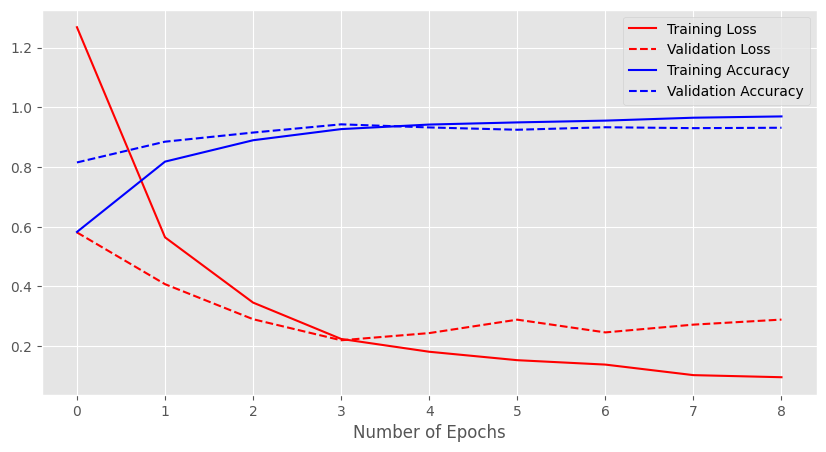

In [ ]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

1/1 [==============================] - 0s 240ms/step


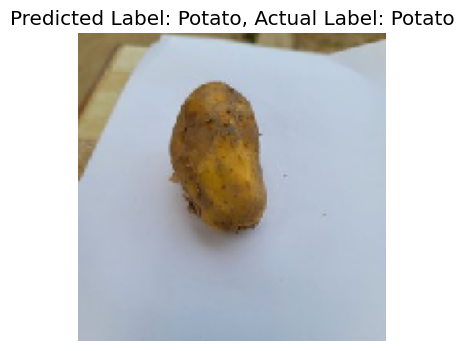

In [ ]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/Big/test/Potato/1001.jpg'

def generate_predictions(test_image_path, actual_label, bool=0):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    if bool == 0:
      plt.figure(figsize=(4, 4))
      plt.imshow(test_img_arr)
      plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
      plt.grid()
      plt.axis('off')
      plt.show()

    if bool == 1:
      return predicted_vegetable

# call the function
generate_predictions(test_image_path, actual_label='Potato')

1/1 [==============================] - 0s 130ms/step
Confidence that the image is a Bean: 0.36500901915133%
Confidence that the image is a Bitter_Gourd: 0.7330797612667084%
Confidence that the image is a Bottle_Gourd: 0.046318277600221336%
Confidence that the image is a Brinjal: 0.07683606236241758%
Confidence that the image is a Broccoli: 0.046979356557130814%
Confidence that the image is a Cabbage: 0.01332003012066707%
Confidence that the image is a Capsicum: 12.36887276172638%
Confidence that the image is a Carrot: 9.048541635274887%
Confidence that the image is a Cauliflower: 0.09599837940186262%
Confidence that the image is a Cucumber: 1.2658548541367054%
Confidence that the image is a Papaya: 0.9476792067289352%
Confidence that the image is a Potato: 73.24113845825195%
Confidence that the image is a Pumpkin: 0.12634582817554474%
Confidence that the image is a Radish: 0.5627424456179142%
Confidence that the image is a Tomato: 1.0612789541482925%


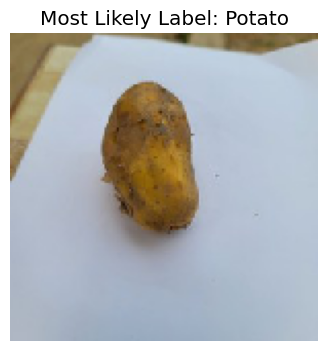

In [ ]:
# Load the image and prepare it for prediction
test_img = image.load_img(test_image_path, target_size=(150, 150))
test_img_arr = image.img_to_array(test_img)/255.0
test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

# Make Predictions
predicted_probabilities = model.predict(test_img_input)[0]   # Get predicted probabilities for all classes

# Get labels and corresponding probabilities
for i in range(len(predicted_probabilities)):
    predicted_vegetable = class_map[i]
    confidence_percentage = predicted_probabilities[i]*100   # Convert probability to percentage
    print(f"Confidence that the image is a {predicted_vegetable}: {confidence_percentage}%")

# Display the image with the most likely label
predicted_label = np.argmax(predicted_probabilities)  # Get the index of the max probability
predicted_vegetable = class_map[predicted_label]
plt.figure(figsize=(4, 4))
plt.imshow(test_img_arr)
plt.title("Most Likely Label: {}".format(predicted_vegetable))
plt.grid()
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Big/recipev1.csv')
df.head()

,name,ingredient,region,link
0,asian orange chicken,"['water', 'rice vinegar', 'lemon juice', 'soy ...",Chinese,https://www.allrecipes.com/recipe/61024/asian-...
1,perfect pot stickers,"['ground pork', 'minced garlic', 'finely chopp...",Chinese,https://www.allrecipes.com/recipe/261153/perfe...
2,pork dumplings,"['wonton wrappers', 'ground pork', 'minced fre...",Chinese,https://www.allrecipes.com/recipe/14759/pork-d...
3,super easy stir fried cabbage,"['vegetable oil', 'garlic, minced', 'shredded ...",Chinese,https://www.allrecipes.com/recipe/174210/super...
4,kung pao chicken,"['cornstarch, dissolved in 2 tablespoons water...",Chinese,https://www.allrecipes.com/recipe/9027/kung-pa...


In [ ]:
generate_predictions(test_image_path, actual_label='Potato', bool=1)

1/1 [==============================] - 0s 43ms/step


'Potato'

In [ ]:
a = generate_predictions(test_image_path, actual_label='Potato', bool=1)

1/1 [==============================] - 0s 123ms/step


In [ ]:
for index, row in df.iterrows():
    print(row['name'], '\n', row['region'], '\n', row['ingredient'], '\n', row['link'])

In [ ]:
for i in df['ingredient']:
  if 'apple' in i:
    print(i)

['pork butt, cut into 1 inch cubes', 'soy sauce', 'salt', 'white sugar', 'egg white', 'green onions, chopped', 'vegetable oil for frying', 'cornstarch', 'vegetable oil', 'celery, cut into 1/2 inch pieces', 'green bell pepper, cut into 1 inch pieces', 'medium onion, cut into wedges', 'white sugar, or to taste', 'salt to taste', 'water, divided', 'white sugar', 'apple cider vinegar', 'ketchup', 'soy sauce', 'salt', 'pineapple chunks, undrained', 'cornstarch']
['pork tenderloin, trimmed of silver skin', 'salt and ground black pepper', 'ketchup', 'seasoned rice vinegar', 'pineapple chunks, drained with juice reserved', 'brown sugar', 'garlic, minced', 'hot chili sauce (such as Sriracha®)', 'soy sauce', 'red pepper flakes', 'vegetable oil', 'butter', 'chopped green onion (white part only)', 'chopped green onion tops']
['unsalted butter', 'vegetable oil', 'boneless, skinless chicken thighs', 'kosher salt, or more to taste', 'curry powder', 'garam masala', 'ground cumin', 'freshly ground blac

In [ ]:
df['ingredient']

0      ['water', 'rice vinegar', 'lemon juice', 'soy ...
1      ['ground pork', 'minced garlic', 'finely chopp...
2      ['wonton wrappers', 'ground pork', 'minced fre...
3      ['vegetable oil', 'garlic, minced', 'shredded ...
4      ['cornstarch, dissolved in 2 tablespoons water...
                             ...                        
451    ['chili powder', 'ground cumin', 'ground papri...
452    ['ground beef', 'onion, chopped', 'chili beans...
453    ['refried beans', 'taco seasoning mix', 'sour ...
454    ['vegetable oil', 'New Mexico or California ch...
455    ['fresh Anaheim chile peppers', 'queso asadero...
Name: ingredient, Length: 456, dtype: object

In [ ]:
df_new = pd.DataFrame()

for index, row in df.iterrows():
  if 'potato' in row['ingredient']:
    temp_df = pd.DataFrame({
        'name': [row['name']],
        'region': [row['region']],
        'ingredient': [row['ingredient']],
        'link': [row['link']]
    })
    df_new = df_new.append(temp_df, ignore_index=True)


In [ ]:
import tensorflow as tf

inception_net = tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
meat_types = [
    'ground',
    'chicken',
    'beef',
    'pork',
    'lamb',
    'sausage',
    'steak',
    'ham',
    'bratwurst',
    'bacon',
    'crab',
    'shrimp',
    'cod',
    'fish',
    'tuna',
    'chicken',
    'breast',
    'turkey',
    'chops',
    'lamb',
    'rib',
    'shoulder',
    'loin',
    'tenderloin',
    'veal',
    'salmon',
    'spareribs',
    'bone',
    'chuck',
    'short',
    'ribs',
    'flanken',
    'pork',
    'belly',
    'tenderloins',
    'chicken',
    'wings',
    'chicken',
    'thighs',
    'chicken',
    'legs',
    'duck',
    'quail',
    'game',
    'meat',
    'venison',
    'elk',
    'moose',
    'rabbit',
    'goat',
    'bison',
    'boar',
    'kangaroo',
    'ostrich',
    'emu',
    'horse',
    'snake',
    'turtle',
    'buffalo',
    'crocodile',
    'alligator',
    'frog',
    'escargot',
]

In [ ]:
def classify_image(inp, region, food_type, allergy):
  # resize input image to match model's expected input shape
  df = pd.read_csv('/content/drive/MyDrive/Big/recipev1.csv')
  inp = tf.image.resize(inp, [150, 150])

  test_img_arr = inp/255.0
  test_img_input = tf.reshape(test_img_arr, (1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
  prediction = np.argmax(model.predict(test_img_input))
  predicted_vegetable = class_map[prediction]

  df_new = pd.DataFrame()

  df['contains_meat'] = df['ingredient'].apply(lambda ingredient_list: any(meat in ingredient_list for meat in meat_types))

  if food_type == 'High Protein':
    df = df[(df['contains_meat'] == True)]
  elif food_type == 'Vegetarian':
    df = df[(df['contains_meat'] == False)]
  else:
    df = df

  if not allergy:
    for index, row in df.iterrows():
      if predicted_vegetable.lower() in row['ingredient']:
        if region in row['region']:
          temp_df = pd.DataFrame({
              'name': [row['name']],
              'region': [row['region']],
              'ingredient': [row['ingredient']],
              'link': [row['link']]
          })
          df_new = df_new.append(temp_df, ignore_index=True)
  else:
    for index, row in df.iterrows():
      if predicted_vegetable.lower() in row['ingredient']:
        if region in row['region']:
          if allergy not in row['ingredient']:
            temp_df = pd.DataFrame({
                'name': [row['name']],
                'region': [row['region']],
                'ingredient': [row['ingredient']],
                'link': [row['link']]
            })
            df_new = df_new.append(temp_df, ignore_index=True)

  json = df_new.to_json(orient='values')
  # html = df_new.to_html()

  print(allergy)




  return json



In [ ]:
import gradio as gr

gr.Interface(
    fn=classify_image,
    inputs=[gr.inputs.Image(),
            gr.Dropdown(df['region'].unique().tolist()),
            gr.Dropdown(['High Protein', 'Vegetarian', 'Normal']),
            'text',
            ],
    outputs='json',
    examples=[["/content/drive/MyDrive/Big/Sample/Test/Potato/1005.jpg"], ["/content/drive/MyDrive/Big/Sample/Test/Tomato/1011.jpg"]]
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2e2e28942e1321fa9d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
